# Use different classifiers to classify mnist dataset

1. **Load Dataset**
2. **EDA**
    - visualize data
    - data distribution
    - means
    - variances
    - covariances
3. **Accuracy Function**
4. **Baysian Classifiers**
    - naive baysian classifier
    - general baysian classfier
    - analyze misclassified data
5. **Binomial Classifier**<br>

<hr>

**Conculsion: general baysian classifier is the best in this study.**

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Load Dataset

In [2]:
mnist_train = pd.read_csv('mnist dataset/mnist_train.csv') # load training mnist
mnist_train = mnist_train.drop(['index','Unnamed: 0'], axis=1) # drop useless columns
mnist_train = mnist_train.sort_values(by=['labels'], ignore_index=True) # rearrange data by their labels
mnist_test = pd.read_csv('mnist dataset/mnist_test.csv') # load testing mnist
mnist_test = mnist_test.drop(['index','Unnamed: 0'], axis=1) # drop useless columns
mnist_test = mnist_test.sort_values(by=['labels'], ignore_index=True) # rearrange data by their labels
print(f'training samples:\t{len(mnist_train)}')
print(f'testing samples:\t{len(mnist_test)}')
mnist_train.head(3) # show data

training samples:	60000
testing samples:	10000


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Load DataFrame Function
def getXy(DF):
    X, y = DF.to_numpy()[:,:-1], DF.to_numpy()[:,-1]
    return X, y
X, y = getXy(mnist_train)
x_test, y_test = getXy(mnist_test)

# EDA

#### visualize data

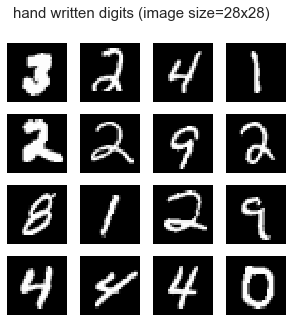

In [4]:
# plot digits
ids = np.random.randint(0, 60000, 16)
plt.figure(figsize=(5,5))
for i in range(ids.shape[0]):
    plt.subplot(4,4,i+1)
    plt.imshow(mnist_train.iloc[ids[i]].values[:-1].reshape(28,28), 'gray')
    plt.axis('off')
plt.suptitle('hand written digits (image size=28x28)', fontsize=15)
plt.show()

#### data distribution

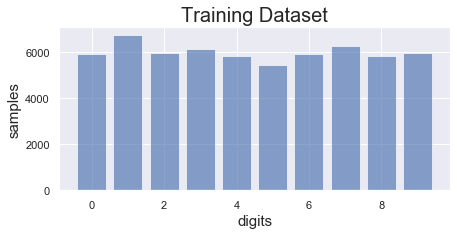

In [5]:
plt.figure(figsize=(7,3))
plt.hist(y, bins=10, alpha=0.65, rwidth=0.8,\
         align='left', range=(0, 10))
plt.ylabel('samples', fontsize=15)
plt.xlabel('digits', fontsize=15)
plt.title('Training Dataset', fontsize=20)
plt.show()

#### means

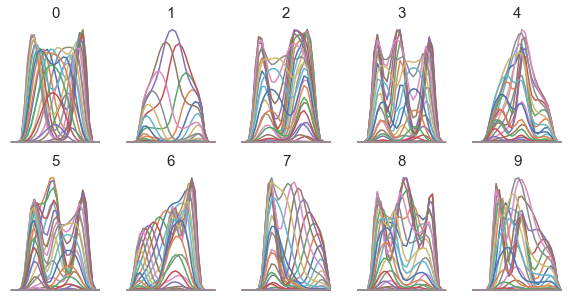

In [6]:
u = np.zeros((10, 784))
plt.figure(figsize=(10,5))
for i in range(10):
    u[i] = np.mean(X[y==i], 0)
    plt.subplot(2,5,i+1)
    plt.plot(u[i].reshape(28, 28))
    plt.axis('off')
    plt.title(str(i), fontsize=15)

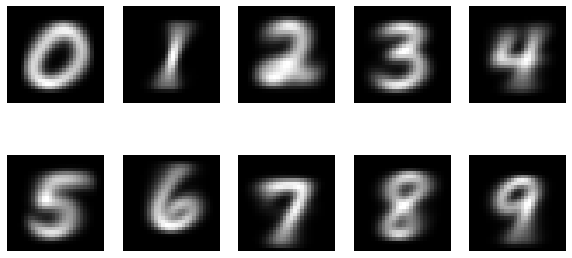

In [7]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(u[i].reshape(28, 28), 'gray')
    plt.axis('off')

#### variances

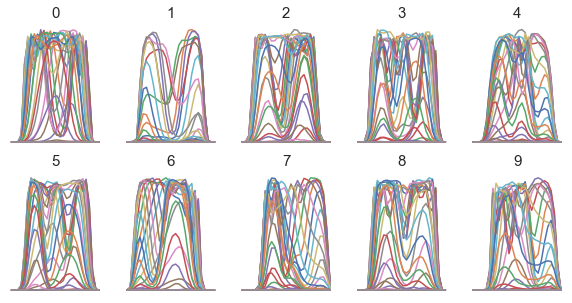

In [8]:
var = np.zeros((10, 784))
plt.figure(figsize=(10,5))
for i in range(10):
    var[i] = X[y==i].var(axis=0)
    plt.subplot(2,5,i+1)
    plt.plot(var[i].reshape(28,28))
    plt.axis('off')
    plt.title(str(i), fontsize=15)

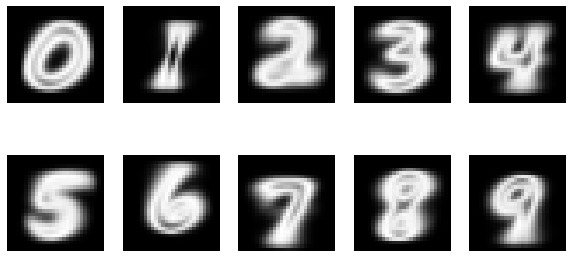

In [10]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(var[i].reshape(28, 28), 'gray')
    plt.axis('off')

#### covariances

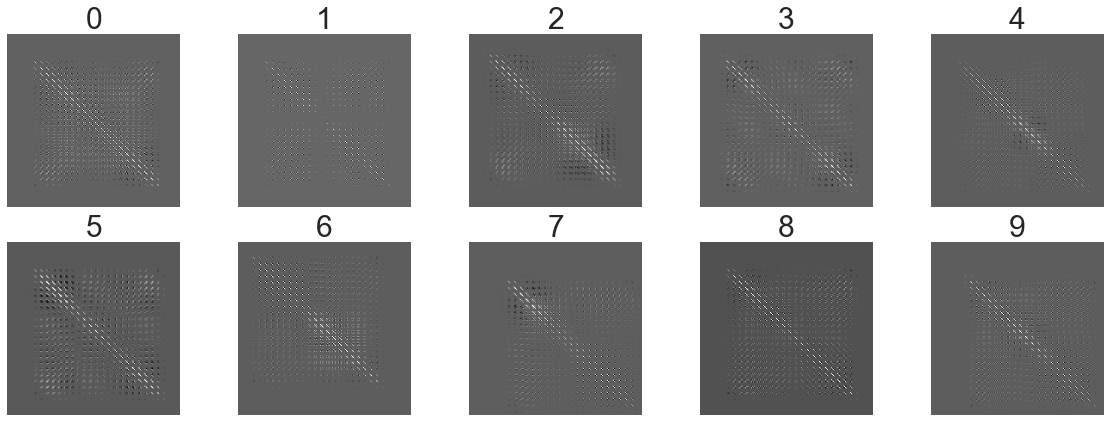

In [11]:
cov = np.zeros((10, 784, 784))
plt.figure(figsize=(20, 7))
for i in range(10):
    c = X[y==i]-u[i]
    d = np.matmul(c.T, c)
    cov[i] = d
    plt.subplot(2,5,i+1)
    plt.imshow(cov[i], 'gray')
    plt.axis('off')
    plt.title(str(i), fontsize=30)

# Accuracy Function

In [12]:
def accuracy(targets, predictions):
    return np.mean(targets == predictions)

def print3accs(model, x_train, x_validation, x_test,\
               y_train, y_validation, y_test):
    pred = model.predict(x_train)
    print('training dataset accuracy: {:.3f}'.format(accuracy(pred, y_train)))
    pred = model.predict(x_validation)
    print('validation dataset accuracy: {:.3f}'.format(accuracy(pred, y_validation)))
    pred = model.predict(x_test)
    print('testing dataset accuracy: {:.3f}'.format(accuracy(pred, y_test)))

# Baysian Classifiers

<br>
Based on the model you choose the likelihood function will change.
<br>
The prior remains the same.
<br>
The evidents is a constant which we can change it to 1.
<br>
We want to maximize the likelihood.
<br>
<br>
<br>
$
\begin{align}
posterior = \frac{likelihood*prior}{evidents} \\
\\
p(y|X) = \frac{p(X|y)p(y)}{p(X)}
\end{align}
$

### naive baysian classifier

In [13]:
from classification_algorithms.naive_baysian_classifier import NB_Classifier

In [14]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=80)
nbc = NB_Classifier()
nbc.fit(x_train, y_train, epsilon=1000)
print3accs(nbc, x_train, x_val, x_test, y_train, y_val, y_test)

training dataset accuracy: 0.804
validation dataset accuracy: 0.804
testing dataset accuracy: 0.817


Text(0.5, 1, 'Testing Dataset Result')

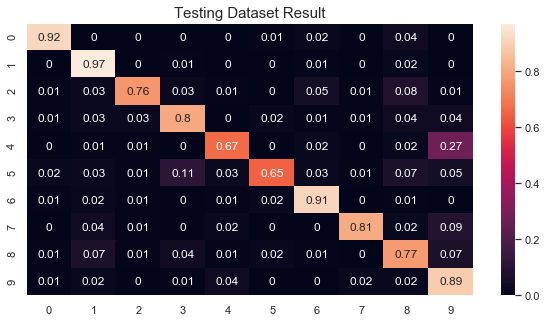

In [16]:
cm = nbc.get_confusion(x_test, y_test)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, annot_kws={'fontsize':12})
plt.title('Testing Dataset Result', fontsize=15)

### general baysian classifier

In [17]:
from classification_algorithms.general_baysian_classifier import GB_Classifier

In [18]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=140)
gbc = GB_Classifier()
gbc.fit(x_train, y_train, epsilon=1175)
print3accs(gbc, x_train, x_val, x_test, y_train, y_val, y_test)

training dataset accuracy: 0.959
validation dataset accuracy: 0.953
testing dataset accuracy: 0.954


Text(0.5, 1, 'Testing Dataset Result')

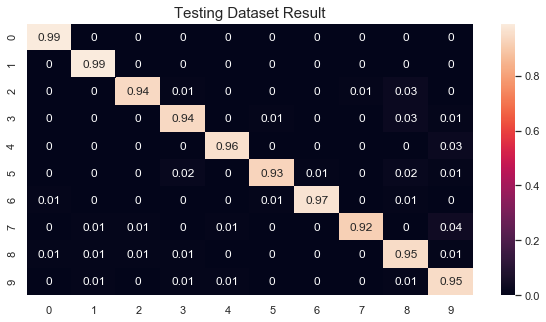

In [19]:
cm = gbc.get_confusion(x_test, y_test)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, annot_kws={'fontsize':12})
plt.title('Testing Dataset Result', fontsize=15)

### analyze misclassified data

In [20]:
def findMisclassifyData(model, X, misclassify):
    # X must only belong to a single category
    # find misclassified data by category
    pred = model.predict(X)
    index = np.where(pred == misclassify)
    images = X[index]
    return images

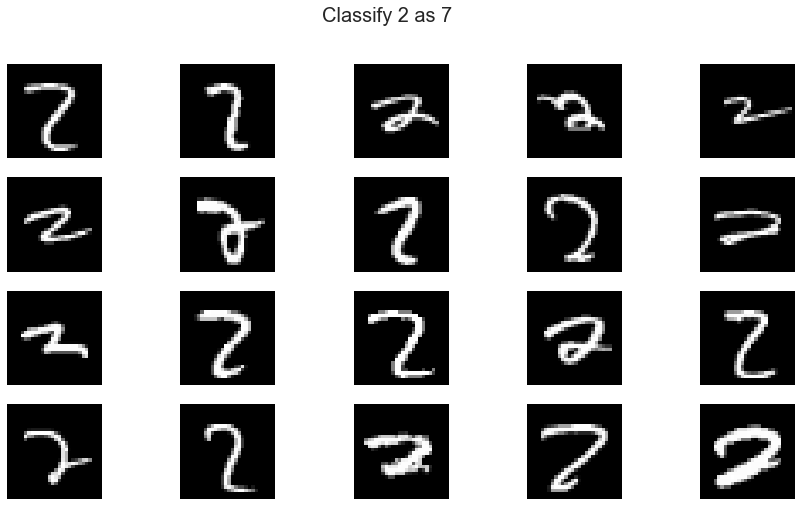

In [21]:
# study case: 2, where 2 misclassifed as 7
c = 2
mis = 7
imgs = findMisclassifyData(gbc, X[y == c], misclassify=mis)
# plot misclassified 2
ids = np.arange(20)
plt.figure(figsize=(15,8))
for i in ids:
    plt.subplot(4,5,i+1)
    plt.imshow(imgs[i].reshape(28,28), 'gray')
    plt.axis('off')
#     plt.title(str(i))
plt.suptitle('Classify {} as {}'.format(c, mis), fontsize=20)
plt.show()

# Binomial Classifier

In [22]:
from classification_algorithms.binomial_classifier import Binomial_Classifier

In [23]:
I = X.copy()
T = y.copy()
I[I<127] = 0
I[I>=127] = 1
x_train, x_val, y_train, y_val = train_test_split(I, T, test_size=0.3, random_state=0)
bc = Binomial_Classifier()
bc.fit(x_train, y_train, epsilon=1e-3)
print3accs(bc, x_train, x_val, x_test, y_train, y_val, y_test)

training dataset accuracy: 0.827
validation dataset accuracy: 0.827
testing dataset accuracy: 0.840


Text(0.5, 1, 'Testing Dataset Result')

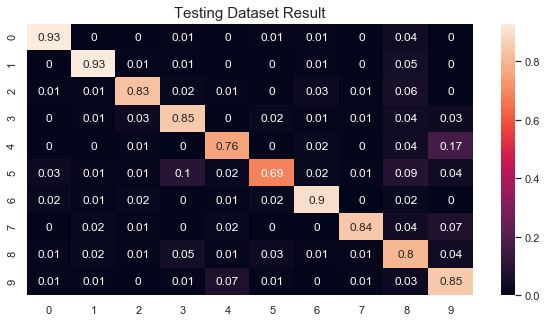

In [24]:
cm = bc.get_confusion(x_test, y_test)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, annot_kws={'fontsize':12})
plt.title('Testing Dataset Result', fontsize=15)